In [1]:
import cv2
img = cv2.imread("images/lena.jpg")
print(img.shape)

print(img[0,0])
print(img.size)
print(512*512*3)

(512, 512, 3)
[127 136 226]
786432
786432


In [2]:
#화소처리, 함수, ROI (Region of Interest), gray, channel, merge, blending, bit
#이진화, dithering
#histogram

In [3]:
import cv2
import numpy as np

img = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)
height, width = img.shape

#C
# for y in range(height):
#     for x in range(width):
#         if (y % 2 == 0):
#           img[y][x]= 0
#파이썬
for y in range(height):
    if (y % 2 == 0):
        img[y,:]= 0
            
cv2.imshow("Lena", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import cv2
import numpy as np

def black_lines(img):
    height,width = img.shape
    _img=np.zeros(img.shape,dtype=np.uint8)
    for y in range(height):
        if(y%2==0):
            #_img[y,:]=0
            pass
        else:
            _img[y,:]=img[y,:]
    return _img

img=cv2.imread('images/lena.jpg',cv2.IMREAD_GRAYSCALE)

black_img=black_lines(img)
cv2.imshow("Lena",black_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
def img_process(func, img, *arg, show = True, **kwargs):
    _img = func(img, *arg, **kwargs)
    if show:
        cv2.imshow("Image", _img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    else:
        return _img

In [6]:
img = cv2.imread('images/lena.jpg', cv2.IMREAD_GRAYSCALE)
t = img_process(black_lines, img, show = False)

In [7]:
cv2.imshow("Lena", t)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
import matplotlib.pyplot as plt

def img_process2(func, img, *args, show = True, win = False, **kwargs):
    _img = func(img, *args, **kwargs)
    if show:
        if win:
            cv2.imshow("Image", _img)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            fig, axes = plt.subplots(1,2)
            axes[0].imshow(img, cmap = 'gray')
            axes[1].imshow(_img, cmap = 'gray', interpolation = None)
    else:
        return _img

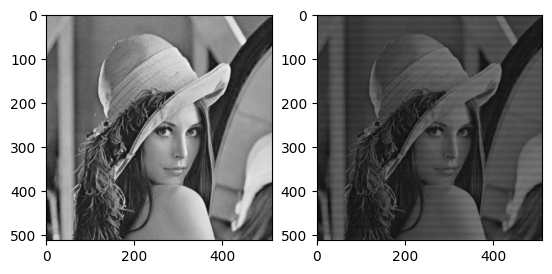

In [9]:
img=cv2.imread('images/lena.jpg',cv2.IMREAD_GRAYSCALE)
img_process2(black_lines,img,win=False)

In [10]:
#ROI
img=cv2.imread('images/lena.jpg',cv2.IMREAD_GRAYSCALE)

roi_img = img[200:380, 200:360]
cv2.imshow('img', img)
cv2.imshow('roi_img', roi_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
#3ch
img=cv2.imread('images/lena.jpg')
b,g,r = cv2.split(img)
print(np.mean(b), np.mean(g), np.mean(r))

img[:,:,[0,1]] = 0
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

105.54556274414062 98.9676513671875 180.31714248657227


In [12]:
# 이미지 합치기 : cv2.add(), np.add()

img1=cv2.imread('images/flower1.jpg')
img2=cv2.imread('images/flower2.jpg')

cv2.imshow('Flower1', img1)
cv2.imshow('Flower2', img2)

cv2.imshow('cv2.add', cv2.add(img1,img2)) #saturation 0~255
cv2.imshow('np.app',np.add(img1,img2)) #module 255넘으면 나머지 값

cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
#블랜딩, trackbar, addweighted
import cv2
import numpy as np

img1=cv2.imread('images/flower1.jpg')
img2=cv2.imread('images/flower2.jpg')

def nothing(x):
    pass

cv2.namedWindow('image')
cv2.createTrackbar('W', 'image', 0, 100, nothing)

while True:
    weight = cv2.getTrackbarPos('W', 'image')
    mixed_image = cv2.addWeighted(img1, float(100-weight)*0.01, 
                                  img2, float(weight)*0.01, 0)
    cv2.imshow('mixed', mixed_image)
    if (cv2.waitKey(1) & 0xff == 27):
        break
    
    
cv2.destroyAllWindows()

In [34]:
import cv2
import numpy as np

img1=cv2.imread('images/flower1.jpg')
img2=cv2.imread('images/flower2.jpg')

def weighted_blending(img1, img2, img1_weight = 0.5):
    output = img1 * img1_weight + img2 * (1 - img1_weight)
    
    return output.astype(np.uint8)

In [36]:
new_image = weighted_blending(img1, img2, img1_weight = 0.7)
cv2.imshow('blend', new_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
#비트 연산
A = np.array([1,2,3,4,5,6], dtype = np.uint8)

In [39]:
A > 2 #배열로 받을 경우 배열에 있는 요소들과 계산한다.

array([False, False,  True,  True,  True,  True])

In [41]:
(A > 3) * 255

array([  0,   0,   0, 255, 255, 255])

#비트 연산 bitwise_and, _or, _not, _xor
A = np.array([1,2,3,4,5,6], dtype = np.uint8)

In [56]:
#threshold (img, 10, 100)
import cv2
import numpy as np
logo = cv2.imread('images/logo.png')
lena = cv2.imread('images/lena.jpg')

rows, cols, channels = logo.shape

roi = lena[50:rows+50, 50:cols+50]
logo_gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(logo_gray, 10.0, 255, cv2.THRESH_BINARY)

mask_inv = cv2.bitwise_not(mask)

cv2.imshow('mask_inv', mask_inv)
cv2.imshow('logo', logo)
cv2.imshow('mask', mask)
cv2.waitKey()
cv2.destroyAllWindows()

In [55]:
# threshold (img, 10,100)
import cv2
import numpy as np
logo=cv2.imread('images/logo.png')
lena=cv2.imread('images/lena.jpg')

rows, cols, channels=logo.shape

roi=lena[50:rows+50, 50:cols+50]
logo_gray=cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
ret,mask=cv2.threshold(logo_gray,10.0,255, cv2.THRESH_BINARY)
mask_inv=cv2.bitwise_not(mask)
lena_mask=cv2.bitwise_and(roi,roi,mask=mask)
lena_inv=cv2.bitwise_and(roi,roi,mask=mask_inv)

cv2.imshow('mask',lena_mask)
cv2.imshow('mask_inv',lena_inv)
cv2.waitKey()
cv2.destroyAllWindows()

In [65]:
# threshold (img, 10,100)
import cv2
import numpy as np
logo=cv2.imread('images/logo.png')
lena=cv2.imread('images/lena.jpg')

rows, cols, channels=logo.shape

roi=lena[50:rows+50, 50:cols+50]
logo_gray=cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
ret,mask=cv2.threshold(logo_gray,10.0,255, cv2.THRESH_BINARY)
mask_inv=cv2.bitwise_not(mask)
logo_fg=cv2.bitwise_and(logo,logo,mask=mask)
lena_bg=cv2.bitwise_and(roi,roi,mask=mask_inv)

lena_mask = cv2.bitwise_and(roi, roi, mask=mask)

#2개 이미지를 합친다.
dst = cv2.add(logo_fg, lena_bg)

#원본 이미지에 추가
lena[50:rows+50, 50:cols+50] = dst

cv2.imshow('dst',lena)

cv2.waitKey()
cv2.destroyAllWindows()

In [72]:
#두 이미지가 조화롭게
import cv2
import numpy as np

logo=cv2.imread('images/logo.png')
lena=cv2.imread('images/lena.jpg')

mask = np.full_like(logo, 255)
height, width = lena.shape[:2]
center = (int(width/2), int(height/2))
normal = cv2.seamlessClone(logo, lena, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(logo, lena, mask, center, cv2.MIXED_CLONE)

cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
cv2.waitKey()
cv2.destroyAllWindows()

In [90]:
#sky + airplane
src = cv2.imread('images/airplane2.jpg')
dst = cv2.imread('images/red_sky.jpg')
src_mask = np.zeros(src.shape, src.dtype)
print(dst.shape)

poly = np.array([(0, 40), (150, 60), (203, 56), 
                 (200, 100), (88, 103), (1, 75)], np.int32)

cv2.fillPoly(src_mask, [poly], (255, 255, 255))
location = (600, 150)

output = cv2.seamlessClone(src, dst, src_mask, location, cv2.MIXED_CLONE)

cv2.imshow('output', output)
cv2.waitKey()
cv2.destroyAllWindows()

(449, 800, 3)


In [101]:
# seamless + camera(bg) + airplane2.jpg(fg)
import time
import cv2
import numpy as np

src = cv2.imread('images/airplane2.jpg')
src_mask = np.zeros(src.shape, src.dtype)

poly = np.array([(0, 40), (150, 60), (203, 56), 
                 (200, 100), (88, 103), (1, 75)], np.int32)

cv2.fillPoly(src_mask, [poly], (255, 255, 255))
location = (1100, 150)

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

if(cap.isOpened()):
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
    delay = 33
    
    while True:
        ret, img = cap.read()
        if ret:
            
            output = cv2.seamlessClone(src, img, src_mask, location, cv2.NORMAL_CLONE)
            cv2.imshow("Video", output)
            if cv2.waitKey(delay) & 0xff == 27:
                break
            
cap.release()
cv2.destroyAllWindows()

In [105]:
# seamless + camera(bg) + airplane2.jpg(fg)
import time
import cv2
import numpy as np

src = cv2.imread('images/lemon_man.jpg')
src_mask = np.zeros(src.shape, src.dtype)

poly = np.array([(100, 14), (29, 65), (52, 199), 
                 (106, 219), (178, 175), (177, 66)], np.int32)

cv2.fillPoly(src_mask, [poly], (255, 255, 255))
location = (1100, 150)

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)

if(cap.isOpened()):
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
    delay = 33
    
    while True:
        ret, img = cap.read()
        if ret:
            
            output = cv2.seamlessClone(src, img, src_mask, location, cv2.NORMAL_CLONE)
            cv2.imshow("Video", output)
            if cv2.waitKey(delay) & 0xff == 27:
                break
            
cap.release()
cv2.destroyAllWindows()

In [110]:
#이진화 -binary
import numpy as np

def two_tone(img, threshold = 128):
    output = (img>threshold)*255 #True = 1 * 255, False = 0*255
    return output.astype(np.uint8)

In [124]:
import cv2

original = cv2.imread('images/chimchim.jpg')
img=cv2.imread('images/chimchim.jpg',cv2.IMREAD_GRAYSCALE)

new_img=two_tone(img,threshold=100)
cv2.imwrite('lena_bin.jpg',new_img)

cv2.imshow('original', original)
cv2.imshow('bin',new_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# dithering
def minmax(pixel):
    if pixel > 255:
        pixel = 255
    if pixel < 0:
        pixel = 0
        
    return pixel

In [125]:
# 76 플로이드, 스타인버그
import numpy as np

def dithering(img):
    height, width = img.shape
    for y in range(0, height + 1):
        for x in range(1, width):
            p = img[y,x]
            new_p = np.round(p/255)*255
            img[y,x] = new_p
            e = p - new_p
    
            img[y   , x+1] = minmax([y   , x+1] + e* 7/16)
            img[y+1 , x  ] = minmax([y+1 , x  ] + e* 5/16)
            img[y+1 , x-1] = minmax([y+1 , x-1] + e* 3/16)
            img[y+1 , x+1] = minmax([y+1 , x+1] + e* 1/16)
    return img

In [126]:
import cv2

original = cv2.imread('images/chimchim.jpg')
chimchim_dithering = dithering(img.copy())

cv2.imshow('original', original)
cv2.imshow('chimchim_dithering',chimchim_dithering)
cv2.waitKey()
cv2.destroyAllWindows()

NameError: name 'minmax' is not defined

In [66]:
#미션
#시계에 사진 이미지 넣고 정각이 되면 다른사진으로 변경하기
import cv2
import numpy as np
import math
from datetime import datetime

img = np.full((500, 500, 3), 255, dtype=np.uint8)
radius = 250
cv2.circle(img, (250, 250), 250, (255, 235, 236), -3)
 
def update_clock(img):
    # 현재 시간 가져오기
    now = datetime.now()
    hour = now.hour
    minute = now.minute
    second = now.second
    
    # 시침, 분침, 초침 그리기
    center = (250, 250)
    hour_length = 150
    minute_length = 200
    second_length = 200
    
    # 시침 그리기
    hour_angle = ((hour % 12) * 30 + (minute / 60) * 30 - 90)
    hour_x = int(center[0] + hour_length * np.cos(np.radians(hour_angle)))
    hour_y = int(center[1] + hour_length * np.sin(np.radians(hour_angle)))
    cv2.line(img, center, (hour_x, hour_y), (255, 178, 181), 5)
    
    # 분침 그리기
    minute_angle = (minute * 6 - 90)
    minute_x = int(center[0] + minute_length * np.cos(np.radians(minute_angle)))
    minute_y = int(center[1] + minute_length * np.sin(np.radians(minute_angle)))
    cv2.line(img, center, (minute_x, minute_y), (72, 255, 250), 3)
    
    # 초침 그리기
    second_angle = (second * 6 - 90)
    second_x = int(center[0] + second_length * np.cos(np.radians(second_angle)))
    second_y = int(center[1] + second_length * np.sin(np.radians(second_angle)))
    cv2.line(img, center, (second_x, second_y), (92,229,188), 1)
    
    # 시계에 숫자 표시하기
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2
    for i in range(1, 13):
        angle = np.radians(i * 30 - 90)
        x = int(center[0] + 220 * np.cos(angle))  # 내부 반지름보다 작은 값으로 조정
        y = int(center[1] + 220 * np.sin(angle))  # 내부 반지름보다 작은 값으로 조정
        cv2.putText(img, str(i), (x, y), font, font_scale, (166, 97, 243), font_thickness, cv2.LINE_AA)

    
    # 업데이트된 시계 이미지 반환
    return img

while True:
    # 시계 이미지 업데이트
    updated_img = update_clock(np.copy(img))
    
    # 시계 이미지 표시
    cv2.imshow('Clock', updated_img)
    
    # 키 입력 대기 (1000ms 동안)
    key = cv2.waitKey(1000)
    
    # 'esc' 키를 누르면 종료
    if key == 27:
        break

cv2.destroyAllWindows()